In [9]:
!pip install -q pycaret[full] pandas numpy

zsh:1: no matches found: pycaret[full]


In [1]:
import pandas as pd
from pycaret.regression import *
import numpy as np

In [2]:
FILEPATH = './improved_kits_dataset_with_new_components.csv'
data = pd.read_csv(FILEPATH)

data.head()
print(data.columns)

Index(['Kit_ID', 'Body_ID', 'Processor_ID', 'Sensor_ID', 'Actuator_ID',
       'CoolingUnit_ID', 'PowerSplitter_ID', 'FluidFlowUnit_ID',
       'LoadBearingFrame_ID', 'MotorGeneratorUnit_ID', 'Gearbox_ID',
       'CommunicationInterface_ID', 'ChemicalFeedSystem_ID', 'Body_Weight(kg)',
       'Processor_Cores', 'Processor_Frequency(GHz)', 'Sensor_Accuracy',
       'Actuator_MaxSpeed(mm/s)', 'Cooling_Power(W)',
       'PowerSplitter_Efficiency', 'FluidFlowUnit_FlowRate(L/min)',
       'LoadBearingFrame_StressTolerance(kN)', 'MotorGeneratorUnit_Torque(Nm)',
       'Gearbox_Ratio', 'CommInterface_Bandwidth(Mbps)',
       'ChemicalFeedSystem_Rate(ml/s)', 'Total_Power_Consumption(W)',
       'Thermal_Load(W)', 'System_Cost($)', 'Compatibility_Score'],
      dtype='object')


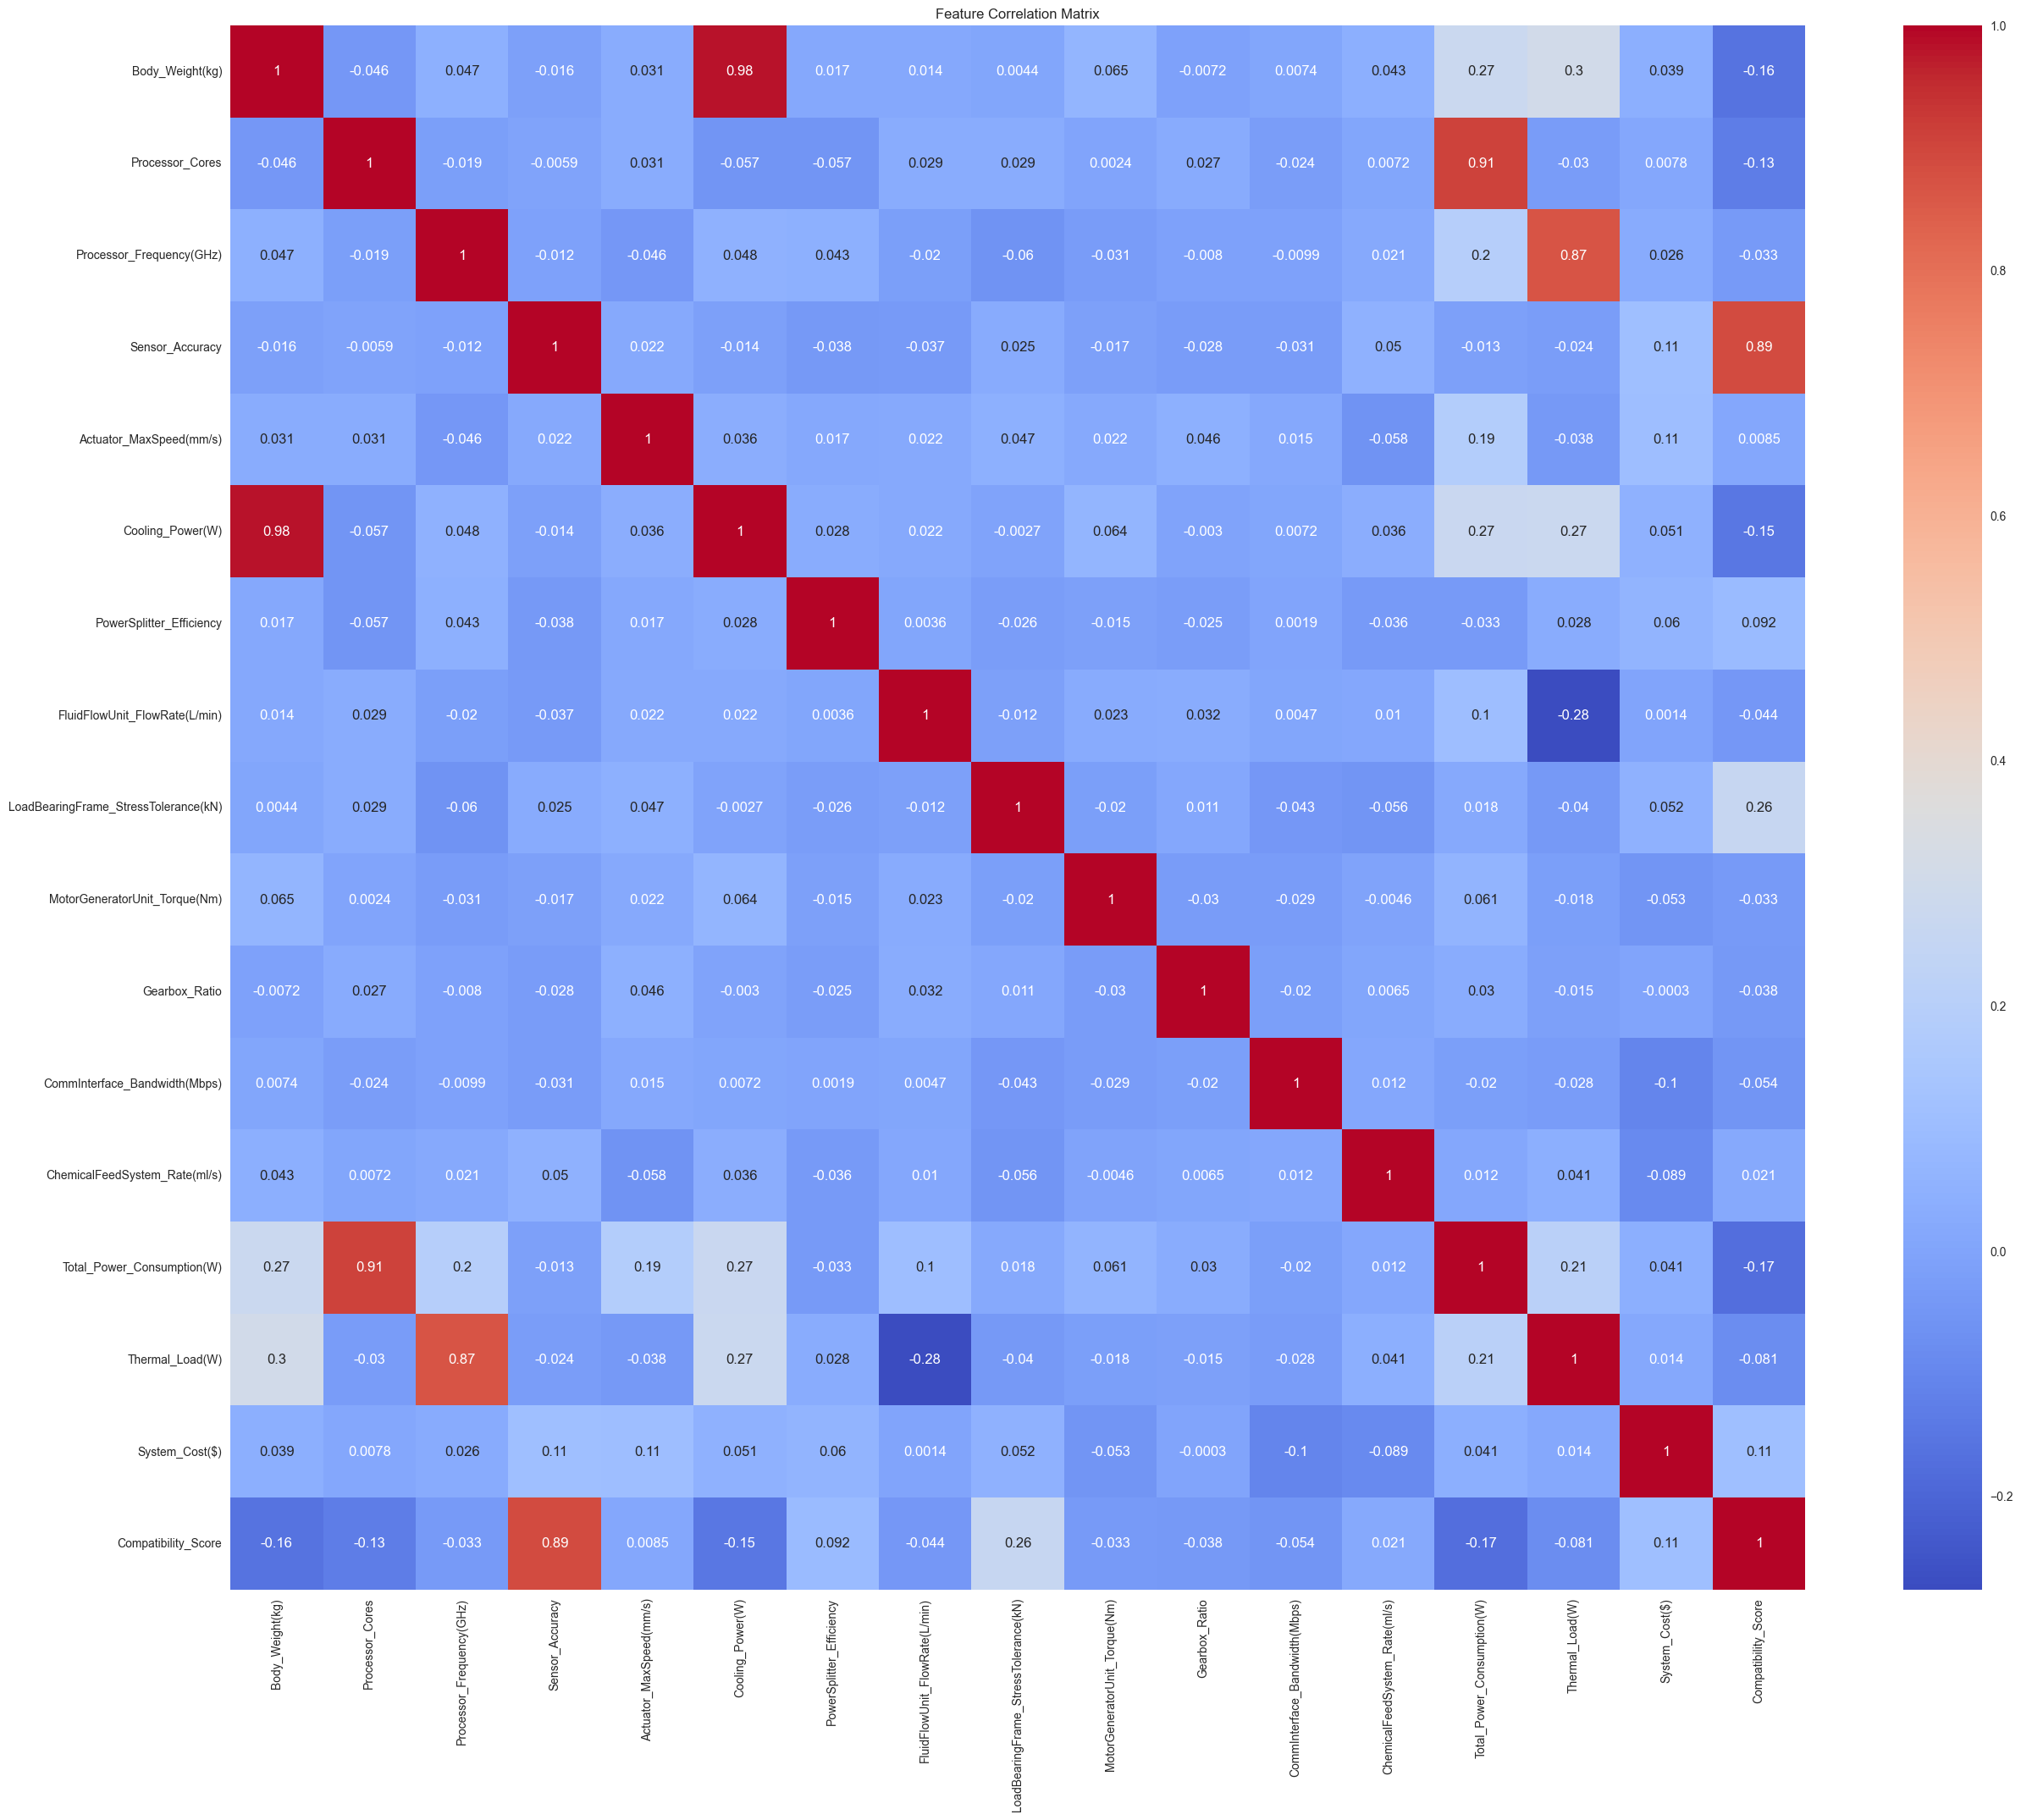

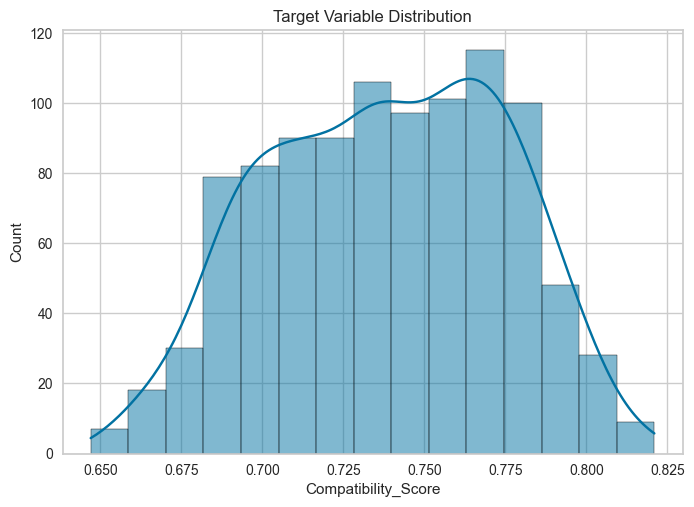

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 24))
sns.heatmap(data.iloc[:, 13:].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

sns.histplot(data["Compatibility_Score"], kde=True)
plt.title("Target Variable Distribution")
plt.show()

In [4]:
exp_reg = setup(
    data,
    target="Compatibility_Score",
    session_id=123,
    normalize=True,  # Keep normalization
    polynomial_features=False,  # Disable polynomial features
    remove_multicollinearity=False,  # Avoid removing multicollinearity automatically
    transformation=False,  # Disable transformations initially
    ignore_features=[
        "Kit_ID",
        "Body_ID",
        "Processor_ID",
        "Sensor_ID",
        "Actuator_ID",
        "CoolingUnit_ID",
        "PowerSplitter_ID",
        "FluidFlowUnit_ID",
        "LoadBearingFrame_ID",
        "MotorGeneratorUnit_ID",
        "Gearbox_ID",
        "CommunicationInterface_ID",
        "ChemicalFeedSystem_ID",
    ],
    # categorical_features=[],
    verbose=True,
    train_size=0.8,
)

,Description,Value
0,Session id,123
1,Target,Compatibility_Score
2,Target type,Regression
3,Original data shape,"(1000, 30)"
4,Transformed data shape,"(1000, 17)"
5,Transformed train set shape,"(800, 17)"
6,Transformed test set shape,"(200, 17)"
7,Ignore features,13
8,Numeric features,16
9,Preprocess,True


In [5]:
best_model = compare_models(sort='R2')

tuned_model = tune_model(best_model)
evaluate_model(tuned_model)
final_model = finalize_model(tuned_model)
predict_model(final_model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0103,0.0001,0.0119,0.8937,0.0068,0.0140,0.4200
ridge,Ridge Regression,0.0103,0.0001,0.0119,0.8937,0.0068,0.0140,0.0040
br,Bayesian Ridge,0.0103,0.0001,0.0119,0.8937,0.0068,0.0140,0.0060
huber,Huber Regressor,0.0104,0.0001,0.0119,0.8922,0.0069,0.0141,0.0050
catboost,CatBoost Regressor,0.0112,0.0002,0.0132,0.8694,0.0076,0.0152,0.2180
gbr,Gradient Boosting Regressor,0.0112,0.0002,0.0131,0.8693,0.0075,0.0152,0.0220
et,Extra Trees Regressor,0.0115,0.0002,0.0137,0.8585,0.0079,0.0157,0.0350
rf,Random Forest Regressor,0.0117,0.0002,0.0137,0.8576,0.0079,0.0158,0.0530
lightgbm,Light Gradient Boosting Machine,0.0116,0.0002,0.0138,0.8570,0.0079,0.0158,0.3160
ada,AdaBoost Regressor,0.0118,0.0002,0.0138,0.8547,0.0080,0.0161,0.0140


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0105,0.0001,0.0120,0.8867,0.0069,0.0143
1,0.0100,0.0001,0.0116,0.9015,0.0067,0.0136
2,0.0106,0.0001,0.0120,0.8885,0.0069,0.0143
3,0.0111,0.0002,0.0127,0.9039,0.0073,0.0152
4,0.0097,0.0001,0.0112,0.8900,0.0064,0.0131
5,0.0099,0.0001,0.0112,0.8973,0.0065,0.0134
6,0.0108,0.0001,0.0122,0.8530,0.0070,0.0148
7,0.0114,0.0002,0.0129,0.8914,0.0074,0.0155
8,0.0091,0.0001,0.0110,0.9265,0.0063,0.0123


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0096,0.0001,0.0111,0.8929,0.0064,0.0131


,Body_Weight(kg),Processor_Cores,Processor_Frequency(GHz),Sensor_Accuracy,Actuator_MaxSpeed(mm/s),Cooling_Power(W),PowerSplitter_Efficiency,FluidFlowUnit_FlowRate(L/min),LoadBearingFrame_StressTolerance(kN),MotorGeneratorUnit_Torque(Nm),Gearbox_Ratio,CommInterface_Bandwidth(Mbps),ChemicalFeedSystem_Rate(ml/s),Total_Power_Consumption(W),Thermal_Load(W),System_Cost($),Compatibility_Score,prediction_label
131,3.5,2,2.0,0.701,150,77,0.876,3.32,82,104,4.45,540,1.20,181.910004,21.830000,2494.010010,0.672,0.677924
203,2.0,2,3.6,0.823,154,54,0.842,2.75,100,93,3.60,916,1.84,190.610001,38.720001,2628.010010,0.736,0.735323
50,2.5,8,3.2,0.860,199,69,0.847,2.38,147,190,2.59,833,1.30,268.089996,37.049999,3160.639893,0.764,0.753354
585,3.0,16,3.2,0.701,168,70,0.876,4.93,147,104,5.07,265,0.70,346.980011,37.529999,3334.149902,0.701,0.682588
138,4.5,4,2.0,0.860,126,92,0.853,4.94,125,104,2.94,924,1.76,215.339996,21.730000,2608.629883,0.736,0.742340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,3.5,6,2.4,0.722,190,82,0.873,1.11,133,132,5.94,61,1.14,238.949997,24.770000,3212.719971,0.696,0.697154
177,3.5,2,2.0,0.780,84,77,0.847,3.72,67,93,5.81,778,1.18,171.050003,23.670000,2763.120117,0.700,0.701827
657,5.0,8,2.6,0.884,195,101,0.940,2.74,133,104,3.60,15,1.72,284.059998,34.840000,3312.409912,0.740,0.756386
210,3.5,6,2.0,0.908,150,84,0.876,1.76,147,180,5.94,990,1.30,227.649994,23.490000,3303.189941,0.769,0.771543


In [16]:
save_model(final_model, 'best_pycaret_model')

save_experiment('experiment_logs')

Transformation Pipeline and Model Successfully Saved
